## Load Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, CondensedNearestNeighbour
from sklearn.preprocessing import RobustScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
originalFeatures = df.columns
print('Shape of Features: ', df.shape)
print('\n  originalFeatures count:', len(originalFeatures))
print('\n  originalFeatures ', (originalFeatures))
print(f'\n  Diabetes Dataset:\n{df.head()}')
print(f'\n  Missing values:\n{df.isnull().sum()}')
print(f'\n  Missing values percentage:\n{(df.isnull().sum()/len(df))*100}')

Shape of Features:  (768, 9)

  originalFeatures count: 9

  originalFeatures  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

  Diabetes Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      NaN           72.0           35.0      0.0   NaN   
1          1.0     85.0           66.0           29.0      0.0   NaN   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0      NaN           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   NaN        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                       NaN  33.0        1  

  Missing values:
Pregnancies      

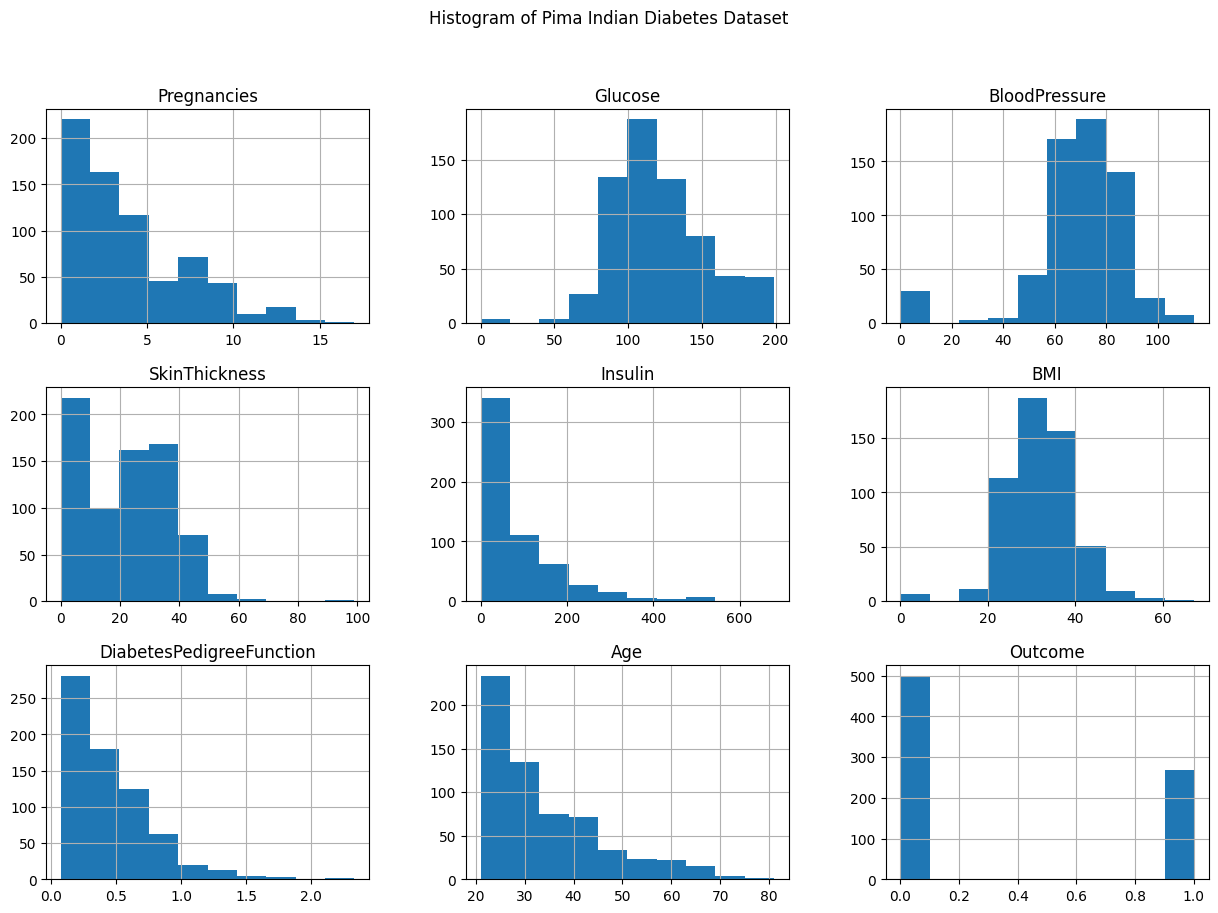

In [4]:
def plot_histograms(data):
    data.hist(bins=10, figsize=(15,10), layout=(3,3))
    plt.suptitle("Histogram of Pima Indian Diabetes Dataset")
    plt.show()

plot_histograms(df)

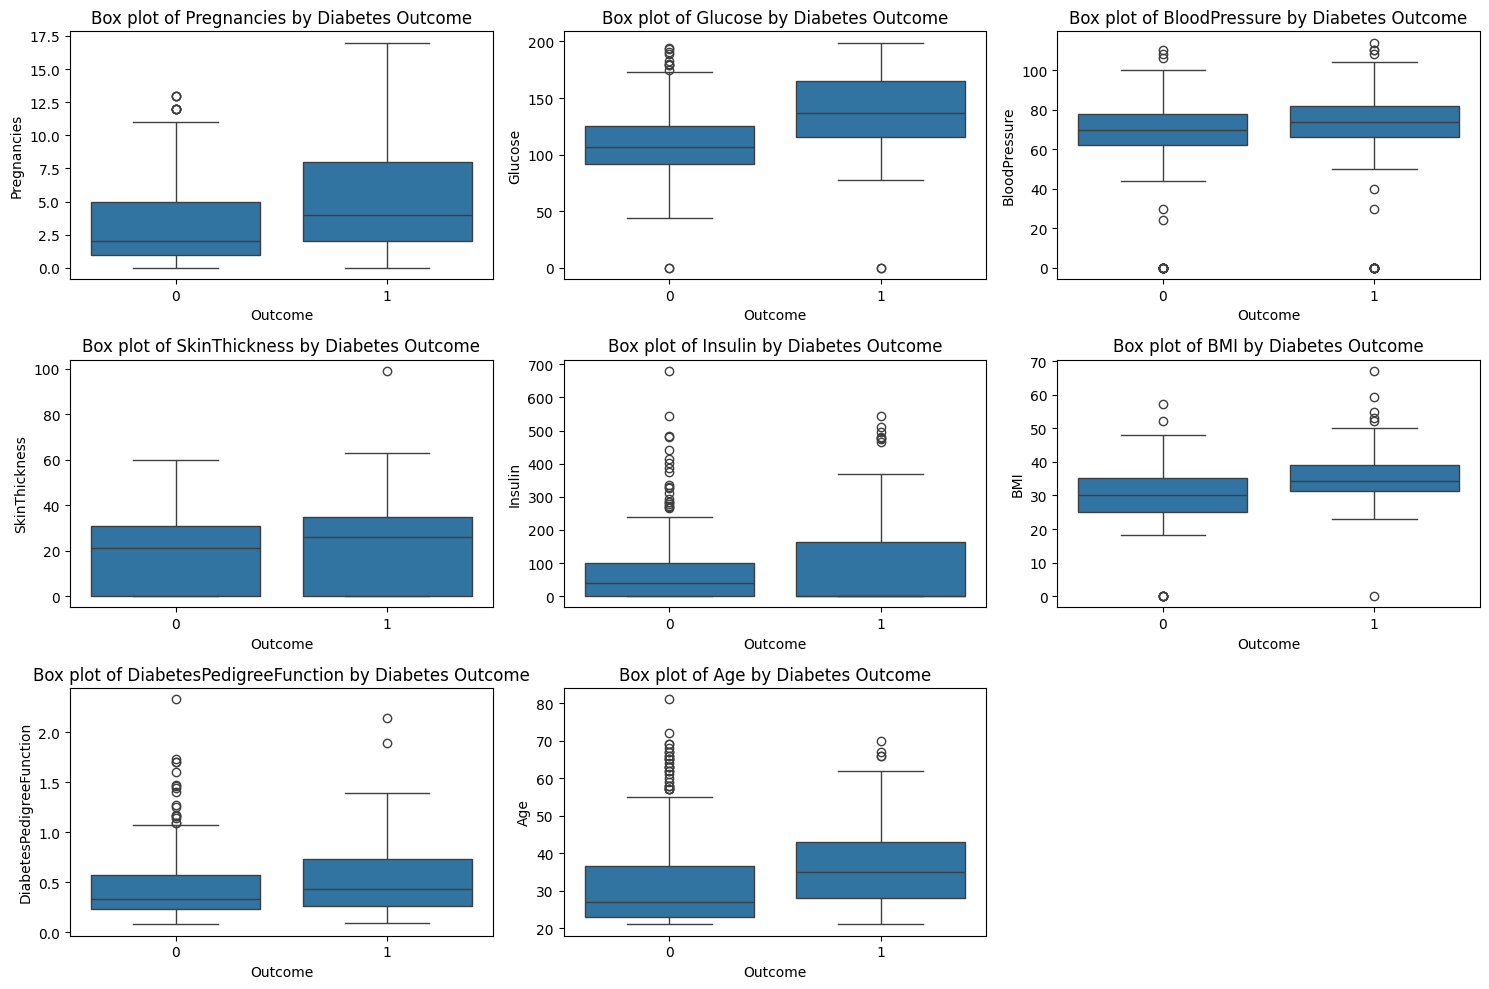

In [5]:
def plot_boxplot(data):
    plt.figure(figsize=(15,10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x='Outcome', y=column, data=data)
        plt.title(f"Box plot of {column} by Diabetes Outcome")
    plt.tight_layout()
    plt.show()

plot_boxplot(df)

## Imputasi missing value dengan mean

In [6]:
df_mean = df.copy()

df_mean = df_mean.fillna(df_mean.mean())

## Imputasi missing value dengan median

In [7]:
df_median = df.copy()

df_median = df_median.fillna(df_median.mean())

## Imputasi missing value dengan modus

In [8]:
df_modus = df.copy()

df_modus = df_modus.fillna(df_modus.mean())

## Cek korelasi imputasi mean antar variabel dengan heatmap

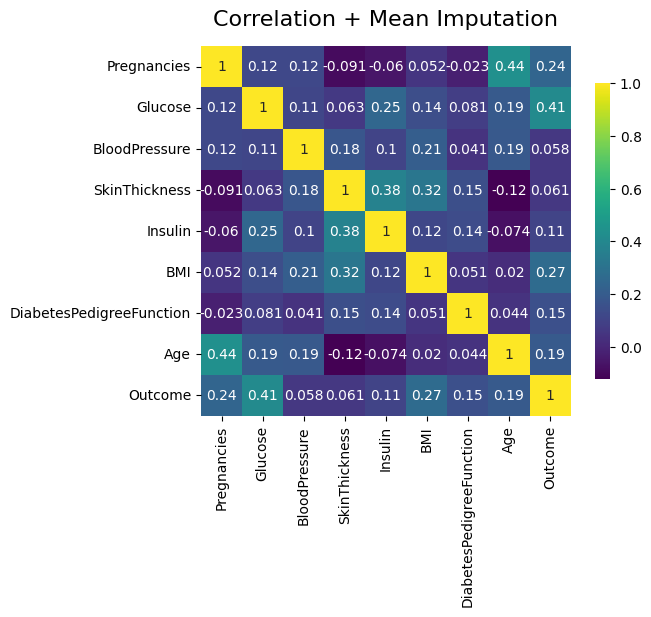

In [9]:
sns.heatmap(df_mean.corr(), annot=True, cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation + Mean Imputation", fontsize=16, pad=15)
plt.show()

## Cek korelasi imputasi median antar variabel dengan heatmap

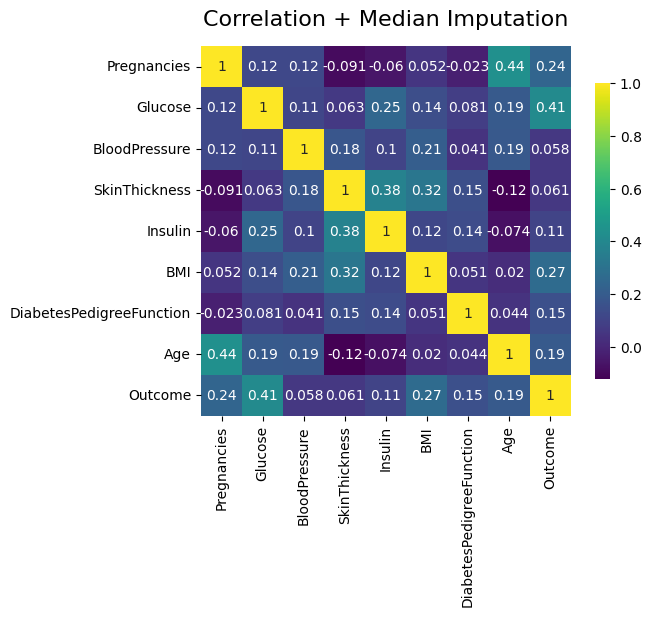

In [10]:
sns.heatmap(df_median.corr(), annot=True, cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation + Median Imputation", fontsize=16, pad=15)
plt.show()

## Cek korelasi imputasi modus antar variabel dengan heatmap

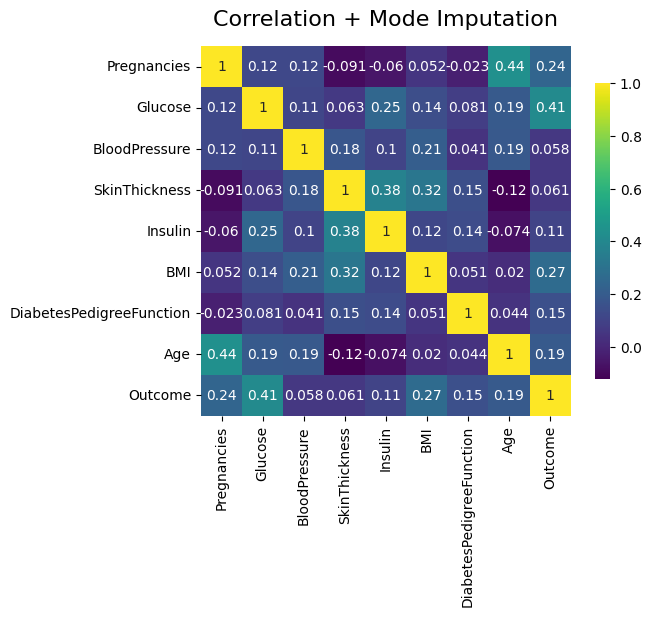

In [11]:
sns.heatmap(df_modus.corr(), annot=True, cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation + Mode Imputation", fontsize=16, pad=15)
plt.show()

## Lakukan imbalance handling dengan undersampling + mean Imputasi

In [12]:
x_mean=df_mean.drop('Outcome', axis=1)
y_mean=df_mean['Outcome']

random = RandomUnderSampler(sampling_strategy='not minority', random_state=42) #semua class kecuali minority
x_resampled_mean, y_resampled_mean = random.fit_resample(x_mean, y_mean)

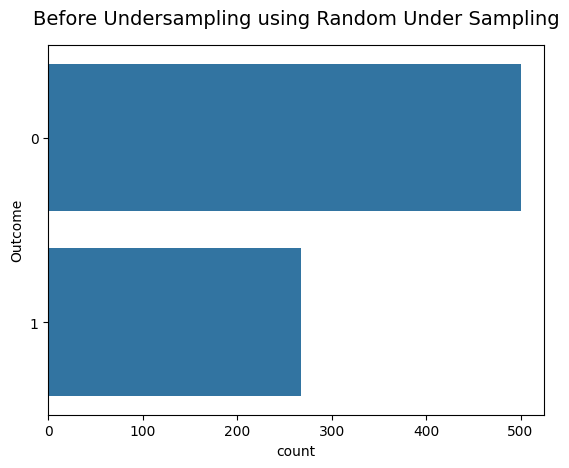

In [13]:
sns.countplot(data=df_mean, y=y_mean)
plt.title("Before Undersampling using Random Under Sampling", fontsize=14, pad=15)
plt.show()

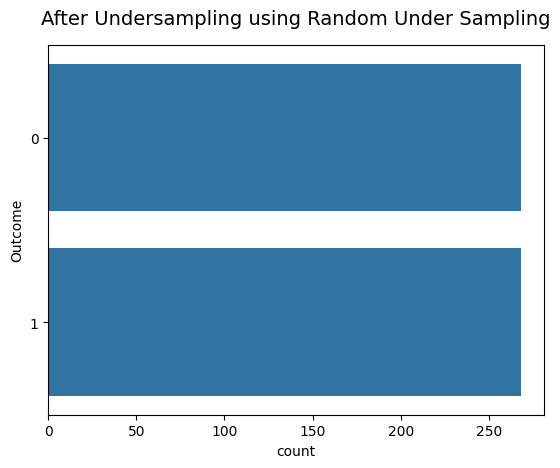

In [14]:
sns.countplot(data=x_resampled_mean, y=y_resampled_mean)
plt.title("After Undersampling using Random Under Sampling", fontsize=14, pad=15)
plt.show()

## Lakukan imbalance handling dengan undersampling + median imputasi

In [15]:
x_median=df_median.drop('Outcome', axis=1)
y_median=df_median['Outcome']

enn = EditedNearestNeighbours(sampling_strategy='majority') #cm yg majority class doang
x_resampled_median, y_resampled_median = enn.fit_resample(x_median, y_median)

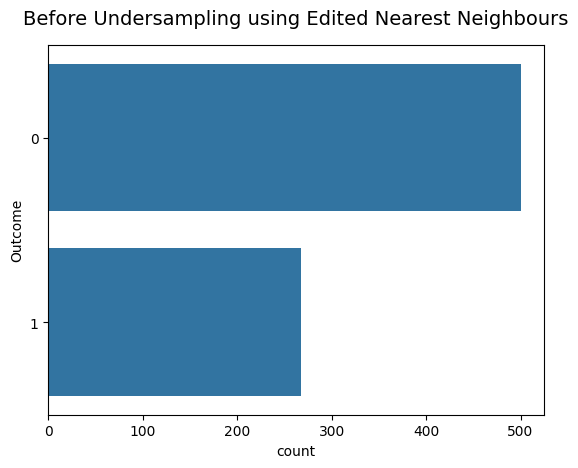

In [16]:
sns.countplot(data=df_median, y=y_median)
plt.title("Before Undersampling using Edited Nearest Neighbours", fontsize=14, pad=15)
plt.show()

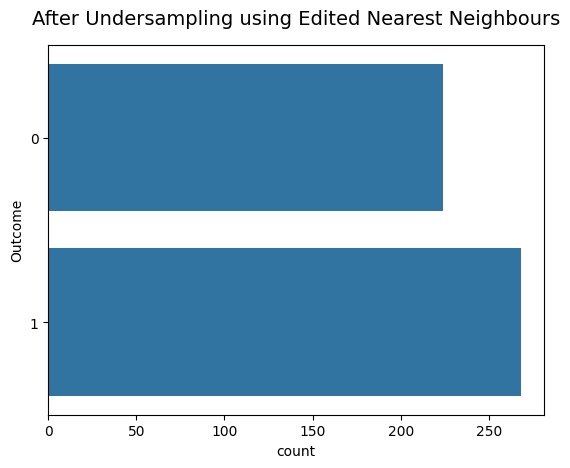

In [17]:
sns.countplot(data=x_resampled_median, y=y_resampled_median)
plt.title("After Undersampling using Edited Nearest Neighbours", fontsize=14, pad=15)
plt.show()

## Lakukan imbalance handling dengan undersampling + modus Imputasi

In [18]:
x_modus=df_modus.drop('Outcome', axis=1)
y_modus=df_modus['Outcome']

cnn = CondensedNearestNeighbour(sampling_strategy='auto') #mirip kek not minority
x_resampled_modus, y_resampled_modus = cnn.fit_resample(x_modus, y_modus)

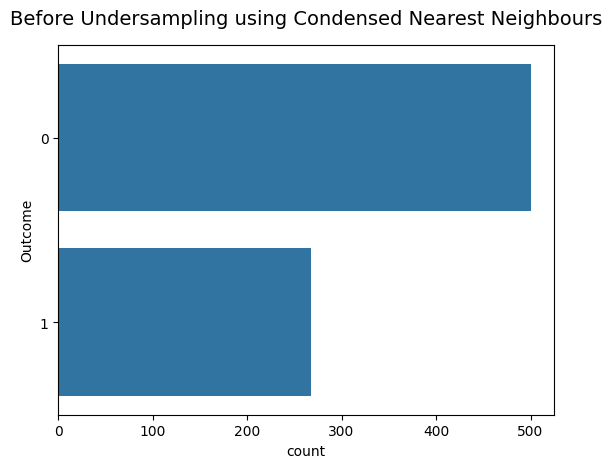

In [19]:
sns.countplot(data=df_modus, y=y_modus)
plt.title("Before Undersampling using Condensed Nearest Neighbours", fontsize=14, pad=15)
plt.show()

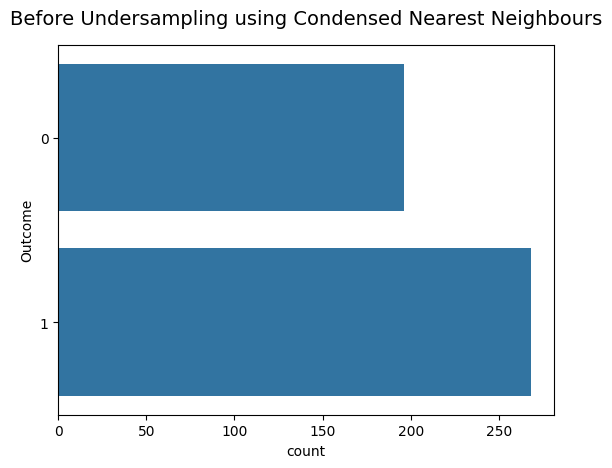

In [20]:
sns.countplot(data=x_resampled_modus, y=y_resampled_modus)
plt.title("Before Undersampling using Condensed Nearest Neighbours", fontsize=14, pad=15)
plt.show()

## Lakukan scaling dengan robust scaler dan minmax mean imputation

In [21]:
scaler = RobustScaler()
df_robust_mean = x_resampled_mean.copy()
df_robust_mean[df_robust_mean.columns.difference(['Outcome'])] = scaler.fit_transform(df_robust_mean[df_robust_mean.columns.difference(['Outcome'])])

In [22]:
scaler = MinMaxScaler()
df_minmax_mean = x_resampled_mean.copy()
df_minmax_mean[df_minmax_mean.columns.difference(['Outcome'])] = scaler.fit_transform(df_minmax_mean[df_minmax_mean.columns.difference(['Outcome'])])

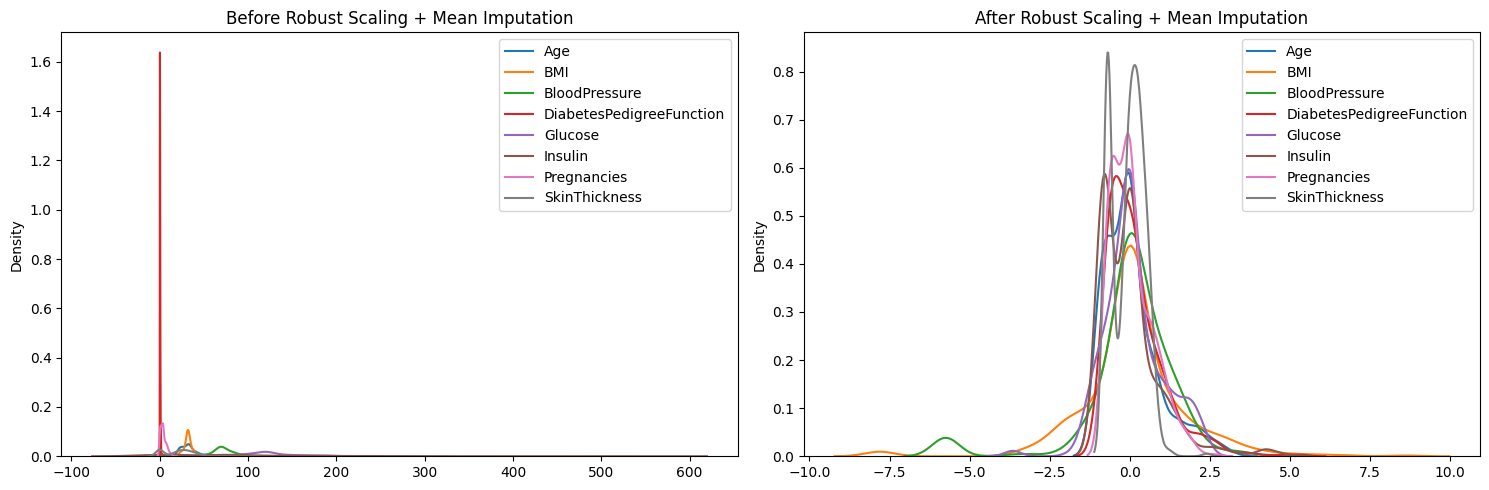

In [23]:
numeric_columns = df_robust_mean.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_mean[column], hist=False, label=column)
plt.title('Before Robust Scaling + Mean Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_robust_mean[column], hist=False, label=column)
plt.title('After Robust Scaling + Mean Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

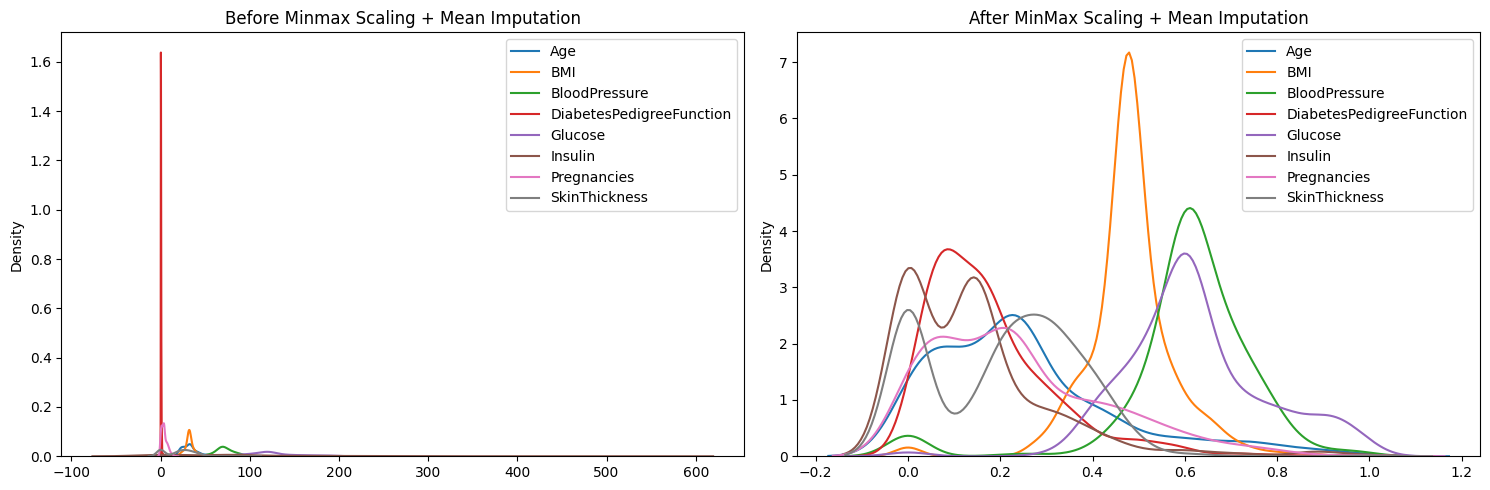

In [24]:
numeric_columns = df_minmax_mean.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_mean[column], hist=False, label=column)
plt.title('Before Minmax Scaling + Mean Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_minmax_mean[column], hist=False, label=column)
plt.title('After MinMax Scaling + Mean Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

## Lakukan scaling dengan robust scaler dan minmax median imputation

In [25]:
scaler = RobustScaler()
df_robust_median = x_resampled_median.copy()
df_robust_median[df_robust_median.columns.difference(['Outcome'])] = scaler.fit_transform(df_robust_median[df_robust_median.columns.difference(['Outcome'])])

In [26]:
scaler = MinMaxScaler()
df_minmax_median = x_resampled_median.copy()
df_minmax_median[df_minmax_median.columns.difference(['Outcome'])] = scaler.fit_transform(df_minmax_median[df_minmax_median.columns.difference(['Outcome'])])

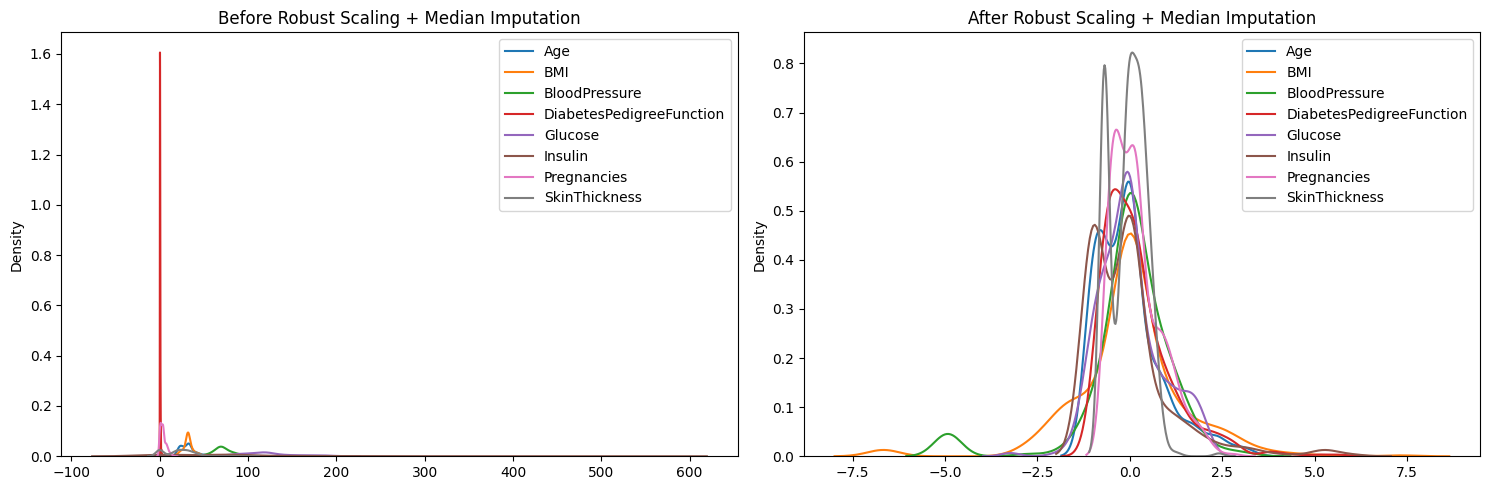

In [33]:
numeric_columns = df_robust_median.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_median[column], hist=False, label=column)
plt.title('Before Robust Scaling + Median Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_robust_median[column], hist=False, label=column)
plt.title('After Robust Scaling + Median Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

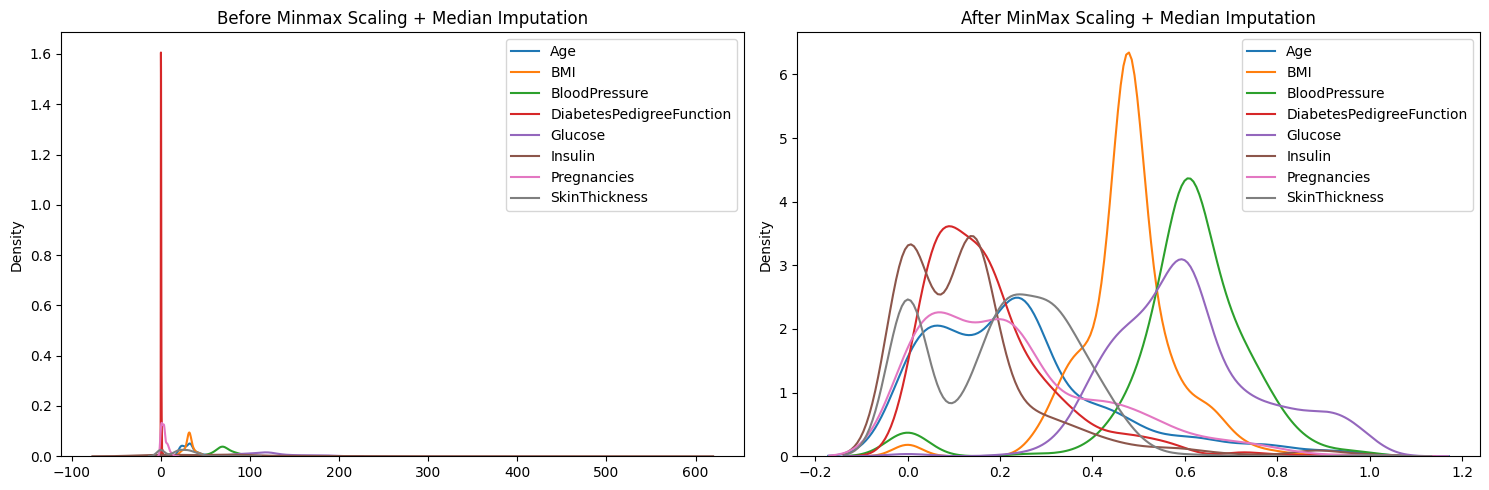

In [28]:
numeric_columns = df_minmax_median.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_median[column], hist=False, label=column)
plt.title('Before Minmax Scaling + Median Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_minmax_median[column], hist=False, label=column)
plt.title('After MinMax Scaling + Median Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

## Lakukan scaling dengan robust scaler dan minmax modus imputation

In [29]:
scaler = RobustScaler()
df_robust_modus = x_resampled_modus.copy()
df_robust_modus[df_robust_modus.columns.difference(['Outcome'])] = scaler.fit_transform(df_robust_modus[df_robust_modus.columns.difference(['Outcome'])])

In [30]:
scaler = MinMaxScaler()
df_minmax_modus = x_resampled_modus.copy()
df_minmax_modus[df_minmax_modus.columns.difference(['Outcome'])] = scaler.fit_transform(df_minmax_modus[df_minmax_modus.columns.difference(['Outcome'])])

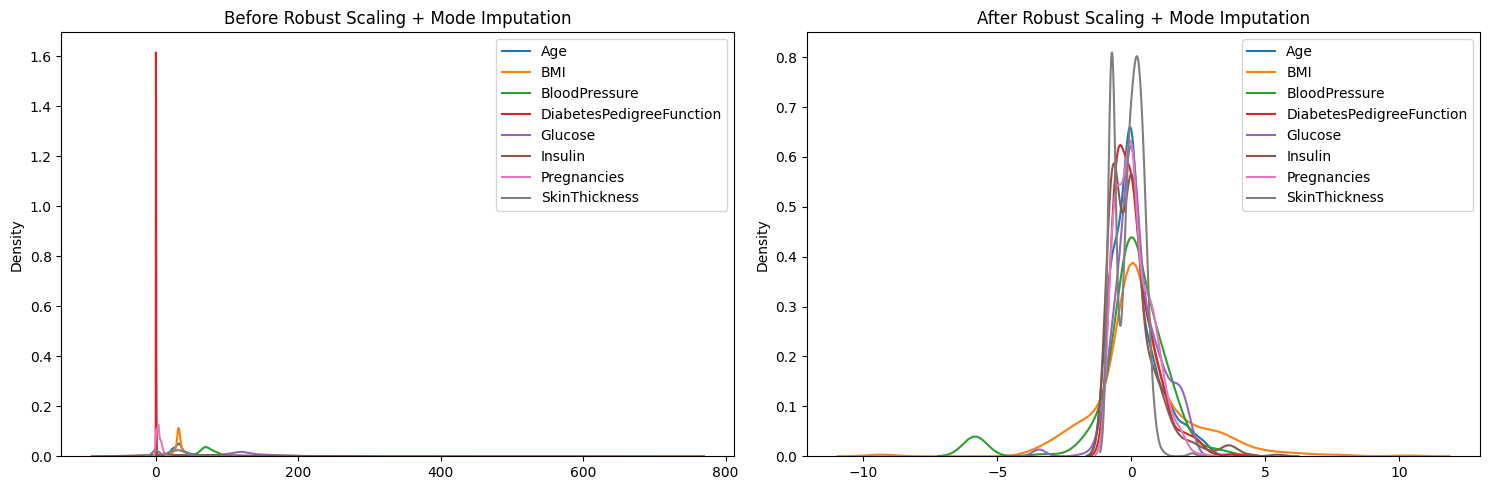

In [31]:
numeric_columns = df_robust_modus.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_modus[column], hist=False, label=column)
plt.title('Before Robust Scaling + Mode Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_robust_modus[column], hist=False, label=column)
plt.title('After Robust Scaling + Mode Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

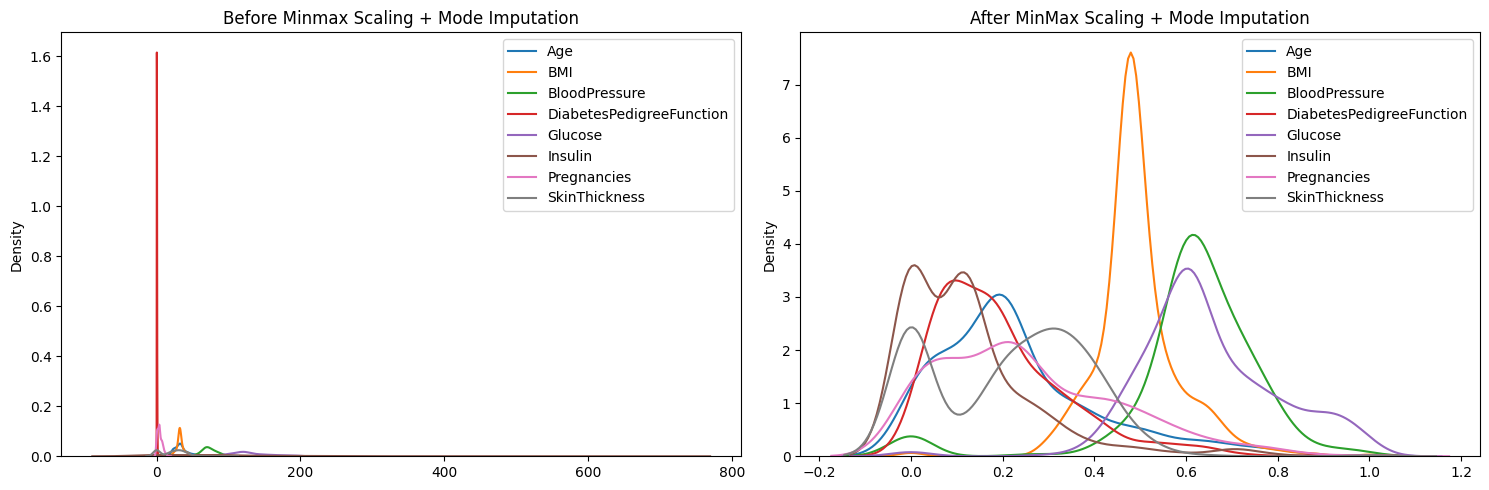

In [34]:
numeric_columns = df_minmax_modus.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_modus[column], hist=False, label=column)
plt.title('Before Minmax Scaling + Mode Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_minmax_modus[column], hist=False, label=column)
plt.title('After MinMax Scaling + Mode Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()